## Exploring 10 seconds recorded by the Max4466 chip

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa  # for audio analysis
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [50]:
from filtering import filter_human
input_file = '_assets/recorded_audio.wav'
raw_audio_file = glob(input_file)

output_file = "_assets/filtered_audio.wav"
filter_human(input_file,output_file,300,3400,4)
# or just 
#filter_human(input_file, output_file)
audio_file = glob(input_file)

In [51]:
ipd.Audio(audio_file[0])

In [52]:
audio_path = librosa.example('trumpet')
ipd.Audio(audio_path)

In [53]:
y, sr = librosa.load(audio_file[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sample rate: {sr}')

y: [-0.8135518  -1.0574837  -0.9503366  -1.0235827  -0.96617186 -1.014912
 -0.9741235  -1.0092163  -0.97839606 -1.0046364 ]
shape y: (220500,)
sample rate: 22050


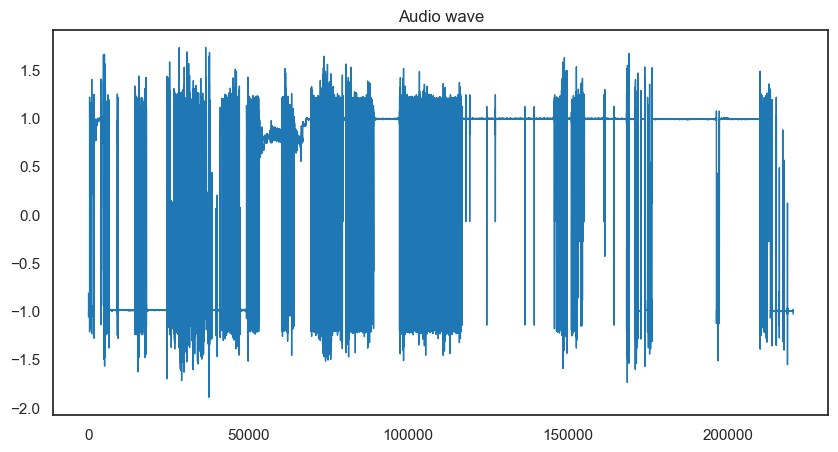

In [54]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio wave',
                 color=color_pal[0])
plt.show()

Based on the image you provided, the audio signal does appear to have a lot of noise. This is evident from the significant fluctuations in the waveform throughout the entire 10-second duration. Here are some observations and potential approaches to filtering the noise in Python:

**Observations:**

- The signal exhibits rapid variations across the entire time range, suggesting the presence of high-frequency noise.
- The frequent peaks and dips in the waveform indicate potential impulsive noise or interference.

**Potential Approaches in Python:**

1. **Frequency Filtering:**
   - Utilize libraries like `scipy.signal` to design filters that attenuate specific frequency ranges associated with the noise. For instance, a high-pass filter can eliminate low-frequency hum, while a low-pass filter can target high-frequency hiss.

2. **Noise Reduction Algorithms:**
   - Explore algorithms like spectral subtraction or Wiener filtering, which attempt to estimate and remove the noise component from the signal. These techniques are often more sophisticated than basic filtering but require careful parameter tuning to avoid signal distortion.

3. **Waveform Denoising Libraries:**
   - Consider libraries like `pydeenoise` or `torchaudio` that offer pre-trained models specifically designed for audio denoising tasks. These can be a good starting point, especially if you don't have extensive experience with signal processing techniques.

Here's an illustrative example using `scipy.signal` for high-pass filtering:

```python
from scipy.signal import butter, lfilter

# Define filter parameters (adjust cutoff frequency as needed)
cutoff_freq = 1000  # Hz
fs = 22050  # Sample rate

# Design high-pass filter
_, _, b = butter(cutoff_freq, cutoff_freq/(fs/2), btype='highpass')

# Apply filter to noisy signal
filtered_signal = lfilter(b, 1, your_noisy_signal)
```

Remember to tailor the filtering approach and parameters based on the specific characteristics of your noise and the desired outcome. It's often beneficial to experiment with different techniques and evaluate their effectiveness in improving the signal quality.

c:\Users\Angry Nerd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Angry Nerd\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Angry Nerd\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_filter_design.py:2746: RuntimeWarning: invalid value encountered in scalar divide
  k_z = k * real(prod(fs2 - z) / prod(fs2 - p))


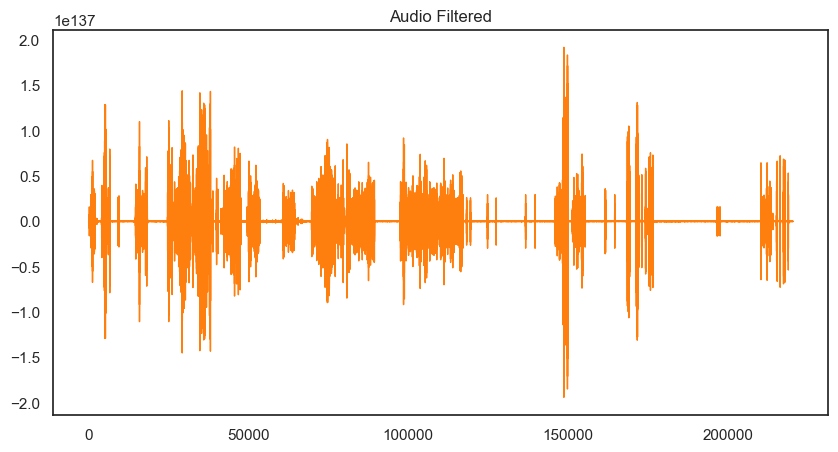

In [69]:
from scipy.signal import butter, lfilter

cutoff_freq = 300
highpass_freq = 3400
fs = 22050 

a, b = butter(cutoff_freq, [cutoff_freq/(fs/2), highpass_freq/(fs/2)], btype='band')
filtered_signal = lfilter(b, 5, y)

pd.Series(filtered_signal).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio Filtered',
                 color=color_pal[1])

plt.show()


In [70]:
import librosa
import soundfile 

output_file = "_assets/filtered_file.wav"
soundfile.write(output_file, filtered_signal, sr)
  
ipd.Audio(output_file)

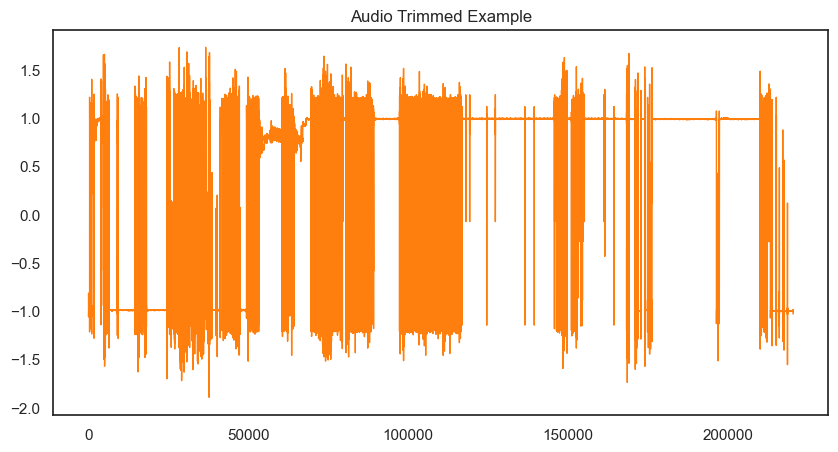

In [56]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=60)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio Trimmed Example',
                 color=color_pal[1])

plt.show()

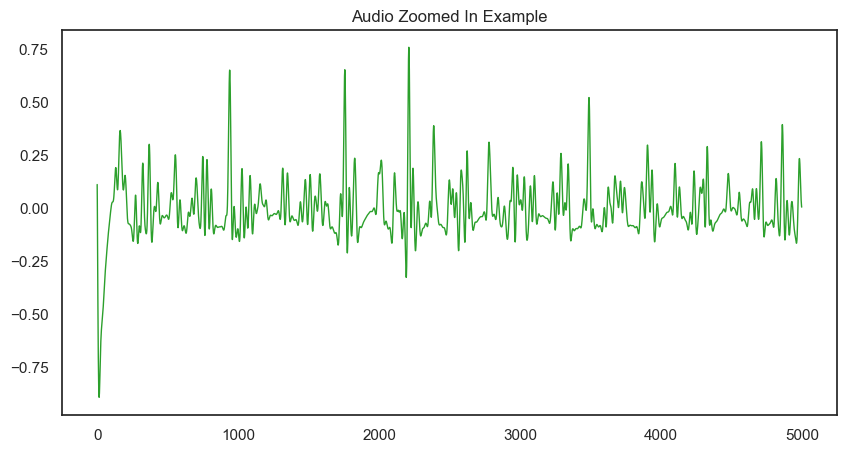

In [32]:
pd.Series(y[0:5000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

# Spectogram

In [33]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 432)

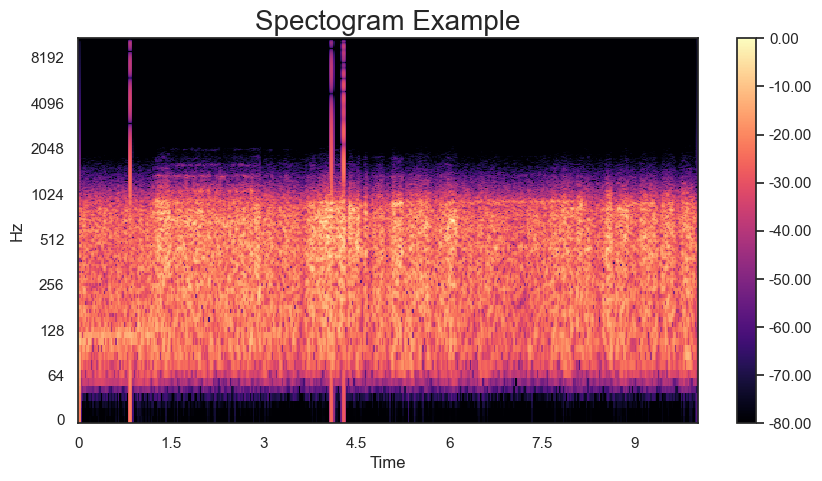

In [34]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Mel Spectogram

In [35]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

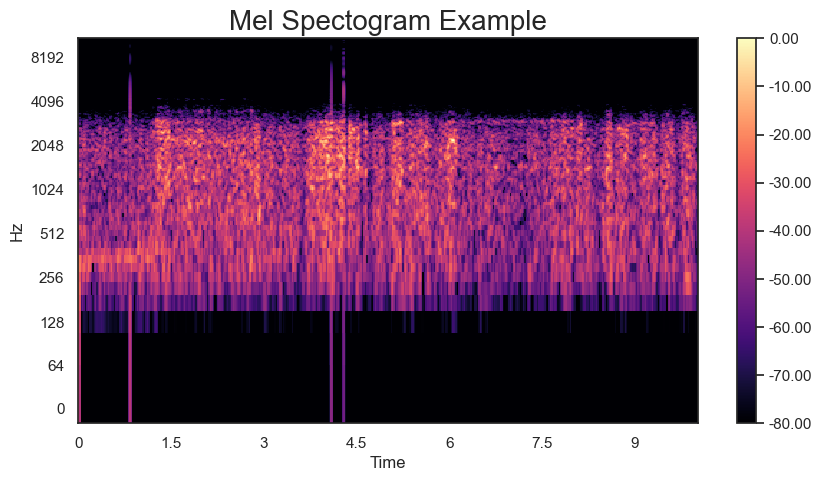

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()